In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

# 데이터 로드

In [3]:
환자 = pd.read_csv('/project/data/폐렴환자.csv', )
환자 = 환자[['SUBJECT_ID', 'EXPIRE_FLAG']]
환자

,SUBJECT_ID,EXPIRE_FLAG
0,252,0
1,253,0
2,268,1
3,269,0
4,665,1
...,...,...
7802,43932,1
7803,43937,1
7804,43959,0
7805,43982,0


In [4]:
lab = pd.read_csv('/project/data/폐렴환자lab.csv')
lab

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,FLAG
0,5144,9,150750.0,50819,2149-11-14 06:07:00,NaN
1,5145,9,150750.0,50820,2149-11-14 06:07:00,NaN
2,5146,9,150750.0,50821,2149-11-14 06:07:00,abnormal
3,5147,9,150750.0,50826,2149-11-14 06:07:00,NaN
4,5148,9,150750.0,50827,2149-11-14 06:07:00,NaN
...,...,...,...,...,...,...
9356344,27427231,96442,120151.0,51248,2115-06-29 04:45:00,NaN
9356345,27427232,96442,120151.0,51249,2115-06-29 04:45:00,NaN
9356346,27427233,96442,120151.0,51250,2115-06-29 04:45:00,NaN
9356347,27427234,96442,120151.0,51254,2115-06-29 04:45:00,abnormal


# 생존여부와 JOIN

In [5]:
data = pd.merge(left = 환자 , right = lab, how = "inner", on = "SUBJECT_ID")
data = data[['SUBJECT_ID','ITEMID','CHARTTIME','FLAG','EXPIRE_FLAG']]
data['FLAG'] = data['FLAG'].str.replace('delta', 'nan')

In [6]:
data.shape

(9356349, 5)

In [7]:
data.head()

,SUBJECT_ID,ITEMID,CHARTTIME,FLAG,EXPIRE_FLAG
0,252,51237,2133-04-07 04:14:00,NaN,0
1,252,51248,2133-04-07 04:14:00,NaN,0
2,252,51249,2133-04-07 04:14:00,NaN,0
3,252,51250,2133-04-07 04:14:00,NaN,0
4,252,51265,2133-04-07 04:14:00,abnormal,0


# 전처리 - time

In [8]:
#시간 부분 제거, date 부분만 남김
import datetime as dt
data['CHARTTIME'] = pd.to_datetime(data['CHARTTIME'])
data['CHARTTIME'] = data['CHARTTIME'].dt.date

In [9]:
data.head()

,SUBJECT_ID,ITEMID,CHARTTIME,FLAG,EXPIRE_FLAG
0,252,51237,2133-04-07,NaN,0
1,252,51248,2133-04-07,NaN,0
2,252,51249,2133-04-07,NaN,0
3,252,51250,2133-04-07,NaN,0
4,252,51265,2133-04-07,abnormal,0


# 중복제거
- 이전과 다르게 time 전처리 후 중복제거

In [10]:
print("제거할 데이터 개수:", data.duplicated().sum())
print("중복 제거 전 shape:", data.shape)

data.drop_duplicates(inplace=True)
print("모두 중복되는 샘플 제거 후 shape:", data.shape)

제거할 데이터 개수: 1948235
중복 제거 전 shape: (9356349, 5)
모두 중복되는 샘플 제거 후 shape: (7408114, 5)


In [11]:
data = data.sort_values(['SUBJECT_ID','CHARTTIME']).reset_index(drop=True)
data = data.set_index('SUBJECT_ID')
data

,ITEMID,CHARTTIME,FLAG,EXPIRE_FLAG
SUBJECT_ID,,,,
9,50856,2149-11-09,NaN,1
9,50868,2149-11-09,NaN,1
9,50879,2149-11-09,NaN,1
9,50880,2149-11-09,NaN,1
9,50882,2149-11-09,abnormal,1
...,...,...,...,...
99985,51006,2182-03-14,abnormal,0
99985,51146,2182-03-14,NaN,0
99985,51200,2182-03-14,NaN,0


In [12]:
data.to_csv("./data/환자_Lab_data.csv")

# dict 생성 (sub, item, final_date)

In [27]:
dic_sub2idx = {}
for i,j in enumerate(data.index.unique()):
    dic_sub2idx[j] = i
dic_sub2idx

{9: 0,
 21: 1,
 31: 2,
 36: 3,
 37: 4,
 41: 5,
 68: 6,
 85: 7,
 94: 8,
 101: 9,
 103: 10,
 105: 11,
 109: 12,
 111: 13,
 112: 14,
 117: 15,
 124: 16,
 136: 17,
 148: 18,
 156: 19,
 157: 20,
 164: 21,
 166: 22,
 175: 23,
 177: 24,
 184: 25,
 186: 26,
 188: 27,
 191: 28,
 203: 29,
 208: 30,
 211: 31,
 214: 32,
 221: 33,
 222: 34,
 223: 35,
 224: 36,
 225: 37,
 231: 38,
 242: 39,
 248: 40,
 252: 41,
 253: 42,
 268: 43,
 269: 44,
 274: 45,
 283: 46,
 286: 47,
 290: 48,
 303: 49,
 305: 50,
 308: 51,
 323: 52,
 328: 53,
 330: 54,
 346: 55,
 356: 56,
 357: 57,
 360: 58,
 364: 59,
 366: 60,
 368: 61,
 370: 62,
 391: 63,
 404: 64,
 412: 65,
 423: 66,
 425: 67,
 426: 68,
 433: 69,
 434: 70,
 450: 71,
 452: 72,
 453: 73,
 457: 74,
 458: 75,
 481: 76,
 482: 77,
 492: 78,
 497: 79,
 499: 80,
 505: 81,
 507: 82,
 508: 83,
 509: 84,
 510: 85,
 514: 86,
 518: 87,
 530: 88,
 536: 89,
 538: 90,
 544: 91,
 546: 92,
 550: 93,
 565: 94,
 571: 95,
 576: 96,
 580: 97,
 586: 98,
 592: 99,
 596: 100,
 605: 101

In [28]:
dic_item2idx = {}
for i,j in enumerate(data['ITEMID'].sort_values().unique()):
    dic_item2idx[j] = i
dic_item2idx

{50800: 0,
 50801: 1,
 50802: 2,
 50803: 3,
 50804: 4,
 50805: 5,
 50806: 6,
 50808: 7,
 50809: 8,
 50810: 9,
 50811: 10,
 50812: 11,
 50813: 12,
 50814: 13,
 50815: 14,
 50816: 15,
 50817: 16,
 50818: 17,
 50819: 18,
 50820: 19,
 50821: 20,
 50822: 21,
 50823: 22,
 50824: 23,
 50825: 24,
 50826: 25,
 50827: 26,
 50828: 27,
 50829: 28,
 50830: 29,
 50831: 30,
 50832: 31,
 50835: 32,
 50836: 33,
 50837: 34,
 50838: 35,
 50839: 36,
 50840: 37,
 50841: 38,
 50842: 39,
 50843: 40,
 50844: 41,
 50845: 42,
 50847: 43,
 50848: 44,
 50849: 45,
 50850: 46,
 50851: 47,
 50852: 48,
 50853: 49,
 50854: 50,
 50855: 51,
 50856: 52,
 50857: 53,
 50858: 54,
 50859: 55,
 50860: 56,
 50861: 57,
 50862: 58,
 50863: 59,
 50864: 60,
 50865: 61,
 50866: 62,
 50867: 63,
 50868: 64,
 50869: 65,
 50870: 66,
 50871: 67,
 50872: 68,
 50873: 69,
 50874: 70,
 50875: 71,
 50876: 72,
 50877: 73,
 50878: 74,
 50879: 75,
 50880: 76,
 50881: 77,
 50882: 78,
 50883: 79,
 50884: 80,
 50885: 81,
 50886: 82,
 50887: 83,
 5

## admission - final

In [29]:
admission = pd.read_csv('../data/ADMISSIONS.csv')
# admission.groupby('SUBJECT_ID')['DISCHTIME'].max()
admission = admission[admission['SUBJECT_ID'].isin(data.index.unique())]

In [30]:
import datetime as dt
admission['DISCHTIME'] = pd.to_datetime(admission['DISCHTIME'])
admission['DISCHTIME'] = admission['DISCHTIME'].dt.date

In [31]:
dic_sub2final_date = dict(admission.groupby('SUBJECT_ID')['DISCHTIME'].max())
dic_sub2final_date

{9: datetime.date(2149, 11, 14),
 21: datetime.date(2135, 2, 8),
 31: datetime.date(2108, 8, 30),
 36: datetime.date(2134, 5, 20),
 37: datetime.date(2183, 8, 26),
 41: datetime.date(2133, 1, 27),
 68: datetime.date(2174, 1, 19),
 85: datetime.date(2167, 7, 30),
 94: datetime.date(2176, 9, 25),
 101: datetime.date(2196, 10, 12),
 103: datetime.date(2144, 9, 1),
 105: datetime.date(2189, 2, 25),
 109: datetime.date(2142, 8, 30),
 111: datetime.date(2144, 7, 1),
 112: datetime.date(2196, 9, 29),
 117: datetime.date(2133, 12, 1),
 124: datetime.date(2166, 2, 1),
 136: datetime.date(2103, 5, 14),
 148: datetime.date(2107, 10, 8),
 156: datetime.date(2121, 1, 27),
 157: datetime.date(2106, 6, 24),
 164: datetime.date(2117, 1, 16),
 166: datetime.date(2105, 1, 24),
 175: datetime.date(2184, 1, 31),
 177: datetime.date(2125, 12, 12),
 184: datetime.date(2168, 5, 13),
 186: datetime.date(2176, 10, 1),
 188: datetime.date(2162, 1, 17),
 191: datetime.date(2196, 4, 21),
 203: datetime.date(2160,

## length

In [32]:
print('dic_sub2idx length : ', len(dic_sub2idx))
print('dic_item2idx length : ', len(dic_item2idx))
print('dic_sub2final_date length : ', len(dic_sub2final_date))

dic_sub2idx length :  7799
dic_item2idx length :  690
dic_sub2final_date length :  7799


# 채워넣기

In [33]:
data.head(2)

,ITEMID,CHARTTIME,FLAG,EXPIRE_FLAG
SUBJECT_ID,,,,
9,50856,2149-11-09,NaN,1
9,50868,2149-11-09,NaN,1


In [34]:
data = data.reset_index()

In [35]:
len(data)

7408114

## test

In [197]:
for i in range(8000):
#     print(i)
    sub, item, charttime, flag = data.iloc[i,0], data.iloc[i,1], data.iloc[i,2], data.iloc[i,3]
#     print(sub, item, charttime, flag)
    subidx = dic_sub2idx[sub]
    itemidx = dic_item2idx[item]
    finaldate = dic_sub2final_date[sub]
    dateidx = -(finaldate - charttime).days + 10
    print(finaldate,'     ', charttime,'     ', dateidx)
    if (dateidx < 0) or (dateidx > 9) :
        continue    
    if flag == 'abnormal':
        print(sub, dateidx, itemidx)

2149-11-14       2149-11-09       5
2149-11-14       2149-11-09       5
2149-11-14       2149-11-09       5
2149-11-14       2149-11-09       5
2149-11-14       2149-11-09       5
9 5 78
2149-11-14       2149-11-09       5
2149-11-14       2149-11-09       5
2149-11-14       2149-11-09       5
2149-11-14       2149-11-09       5
2149-11-14       2149-11-09       5
2149-11-14       2149-11-09       5
9 5 124
2149-11-14       2149-11-09       5
2149-11-14       2149-11-09       5
9 5 164
2149-11-14       2149-11-09       5
2149-11-14       2149-11-09       5
2149-11-14       2149-11-09       5
2149-11-14       2149-11-09       5
2149-11-14       2149-11-09       5
2149-11-14       2149-11-09       5
2149-11-14       2149-11-09       5
2149-11-14       2149-11-09       5
2149-11-14       2149-11-09       5
2149-11-14       2149-11-09       5
2149-11-14       2149-11-09       5
2149-11-14       2149-11-09       5
2149-11-14       2149-11-09       5
2149-11-14       2149-11-09       5
2149-

2135-02-08       2134-09-18       -133
2135-02-08       2134-09-18       -133
2135-02-08       2134-09-18       -133
2135-02-08       2134-09-18       -133
2135-02-08       2134-09-18       -133
2135-02-08       2134-09-18       -133
2135-02-08       2134-09-18       -133
2135-02-08       2134-09-18       -133
2135-02-08       2134-09-18       -133
2135-02-08       2134-09-18       -133
2135-02-08       2134-09-18       -133
2135-02-08       2134-09-18       -133
2135-02-08       2134-09-18       -133
2135-02-08       2134-09-18       -133
2135-02-08       2134-09-18       -133
2135-02-08       2134-09-18       -133
2135-02-08       2134-09-18       -133
2135-02-08       2134-09-19       -132
2135-02-08       2134-09-19       -132
2135-02-08       2134-09-19       -132
2135-02-08       2134-09-19       -132
2135-02-08       2134-09-19       -132
2135-02-08       2134-09-19       -132
2135-02-08       2134-09-19       -132
2135-02-08       2134-09-19       -132
2135-02-08       2134-09-

21 2 453
2135-02-08       2135-01-31       2
21 2 455
2135-02-08       2135-01-31       2
2135-02-08       2135-01-31       2
21 2 476
2135-02-08       2135-01-31       2
21 2 103
2135-02-08       2135-02-01       3
21 3 57
2135-02-08       2135-02-01       3
21 3 59
2135-02-08       2135-02-01       3
2135-02-08       2135-02-01       3
21 3 74
2135-02-08       2135-02-01       3
21 3 78
2135-02-08       2135-02-01       3
2135-02-08       2135-02-01       3
21 3 88
2135-02-08       2135-02-01       3
2135-02-08       2135-02-01       3
21 3 106
2135-02-08       2135-02-01       3
21 3 124
2135-02-08       2135-02-01       3
21 3 147
2135-02-08       2135-02-01       3
2135-02-08       2135-02-01       3
21 3 163
2135-02-08       2135-02-01       3
2135-02-08       2135-02-01       3
2135-02-08       2135-02-01       3
21 3 196
2135-02-08       2135-02-01       3
2135-02-08       2135-02-01       3
2135-02-08       2135-02-01       3
2135-02-08       2135-02-01       3
2135-02-08     

2108-08-30       2108-08-27       7
31 7 425
2108-08-30       2108-08-27       7
2108-08-30       2108-08-27       7
31 7 427
2108-08-30       2108-08-27       7
2108-08-30       2108-08-27       7
2108-08-30       2108-08-27       7
2108-08-30       2108-08-27       7
2108-08-30       2108-08-27       7
31 7 455
2108-08-30       2108-08-27       7
2108-08-30       2108-08-27       7
2108-08-30       2108-08-27       7
2108-08-30       2108-08-27       7
2108-08-30       2108-08-27       7
2108-08-30       2108-08-27       7
31 7 20
2108-08-30       2108-08-28       8
2108-08-30       2108-08-28       8
2108-08-30       2108-08-28       8
31 8 88
2108-08-30       2108-08-28       8
2108-08-30       2108-08-28       8
2108-08-30       2108-08-28       8
31 8 124
2108-08-30       2108-08-28       8
2108-08-30       2108-08-28       8
2108-08-30       2108-08-28       8
2108-08-30       2108-08-28       8
2108-08-30       2108-08-28       8
2108-08-30       2108-08-28       8
31 8 399
210

2134-05-20       2131-05-17       -1089
2134-05-20       2131-05-17       -1089
2134-05-20       2131-05-17       -1089
2134-05-20       2131-05-17       -1089
2134-05-20       2131-05-17       -1089
2134-05-20       2131-05-17       -1089
2134-05-20       2131-05-17       -1089
2134-05-20       2131-05-17       -1089
2134-05-20       2131-05-17       -1089
2134-05-20       2131-05-17       -1089
2134-05-20       2131-05-17       -1089
2134-05-20       2131-05-17       -1089
2134-05-20       2131-05-17       -1089
2134-05-20       2131-05-17       -1089
2134-05-20       2131-05-17       -1089
2134-05-20       2131-05-17       -1089
2134-05-20       2131-05-17       -1089
2134-05-20       2131-05-17       -1089
2134-05-20       2131-05-17       -1089
2134-05-20       2131-05-17       -1089
2134-05-20       2131-05-17       -1089
2134-05-20       2131-05-17       -1089
2134-05-20       2131-05-17       -1089
2134-05-20       2131-05-18       -1088
2134-05-20       2131-05-18       -1088


2134-05-20       2134-05-15       5
36 5 88
2134-05-20       2134-05-15       5
2134-05-20       2134-05-15       5
2134-05-20       2134-05-15       5
36 5 124
2134-05-20       2134-05-15       5
2134-05-20       2134-05-15       5
36 5 163
2134-05-20       2134-05-15       5
2134-05-20       2134-05-15       5
2134-05-20       2134-05-15       5
36 5 196
2134-05-20       2134-05-15       5
36 5 399
2134-05-20       2134-05-15       5
36 5 400
2134-05-20       2134-05-15       5
36 5 415
2134-05-20       2134-05-15       5
2134-05-20       2134-05-15       5
2134-05-20       2134-05-15       5
2134-05-20       2134-05-15       5
2134-05-20       2134-05-15       5
36 5 450
2134-05-20       2134-05-15       5
36 5 451
2134-05-20       2134-05-15       5
2134-05-20       2134-05-15       5
36 5 455
2134-05-20       2134-05-15       5
36 5 476
2134-05-20       2134-05-15       5
2134-05-20       2134-05-15       5
2134-05-20       2134-05-15       5
36 5 4
2134-05-20       2134-05-15    

2133-01-27       2133-01-02       -15
2133-01-27       2133-01-02       -15
2133-01-27       2133-01-02       -15
2133-01-27       2133-01-03       -14
2133-01-27       2133-01-03       -14
2133-01-27       2133-01-03       -14
2133-01-27       2133-01-03       -14
2133-01-27       2133-01-03       -14
2133-01-27       2133-01-03       -14
2133-01-27       2133-01-03       -14
2133-01-27       2133-01-03       -14
2133-01-27       2133-01-03       -14
2133-01-27       2133-01-03       -14
2133-01-27       2133-01-03       -14
2133-01-27       2133-01-03       -14
2133-01-27       2133-01-03       -14
2133-01-27       2133-01-03       -14
2133-01-27       2133-01-03       -14
2133-01-27       2133-01-03       -14
2133-01-27       2133-01-03       -14
2133-01-27       2133-01-03       -14
2133-01-27       2133-01-03       -14
2133-01-27       2133-01-03       -14
2133-01-27       2133-01-03       -14
2133-01-27       2133-01-03       -14
2133-01-27       2133-01-03       -14
2133-01-27  

2133-01-27       2133-01-20       3
41 3 433
2133-01-27       2133-01-20       3
2133-01-27       2133-01-20       3
41 3 441
2133-01-27       2133-01-20       3
2133-01-27       2133-01-20       3
2133-01-27       2133-01-20       3
41 3 453
2133-01-27       2133-01-20       3
41 3 455
2133-01-27       2133-01-20       3
2133-01-27       2133-01-20       3
41 3 476
2133-01-27       2133-01-20       3
2133-01-27       2133-01-20       3
2133-01-27       2133-01-20       3
2133-01-27       2133-01-20       3
2133-01-27       2133-01-20       3
2133-01-27       2133-01-20       3
2133-01-27       2133-01-20       3
2133-01-27       2133-01-21       4
2133-01-27       2133-01-21       4
41 4 58
2133-01-27       2133-01-21       4
2133-01-27       2133-01-21       4
2133-01-27       2133-01-21       4
2133-01-27       2133-01-21       4
2133-01-27       2133-01-21       4
2133-01-27       2133-01-21       4
41 4 88
2133-01-27       2133-01-21       4
2133-01-27       2133-01-21       4
213

2174-01-19       2173-08-12       -150
2174-01-19       2173-08-12       -150
2174-01-19       2173-08-12       -150
2174-01-19       2173-08-12       -150
2174-01-19       2173-08-12       -150
2174-01-19       2173-08-12       -150
2174-01-19       2173-08-12       -150
2174-01-19       2173-08-12       -150
2174-01-19       2173-08-12       -150
2174-01-19       2173-08-12       -150
2174-01-19       2173-08-12       -150
2174-01-19       2173-08-12       -150
2174-01-19       2173-08-12       -150
2174-01-19       2173-08-12       -150
2174-01-19       2173-08-12       -150
2174-01-19       2173-08-12       -150
2174-01-19       2173-08-12       -150
2174-01-19       2173-08-13       -149
2174-01-19       2173-08-13       -149
2174-01-19       2173-08-13       -149
2174-01-19       2173-08-13       -149
2174-01-19       2173-08-13       -149
2174-01-19       2173-08-13       -149
2174-01-19       2173-08-13       -149
2174-01-19       2173-08-13       -149
2174-01-19       2173-08-

2174-01-19       2173-12-28       -12
2174-01-19       2173-12-28       -12
2174-01-19       2173-12-28       -12
2174-01-19       2173-12-28       -12
2174-01-19       2173-12-28       -12
2174-01-19       2173-12-28       -12
2174-01-19       2173-12-28       -12
2174-01-19       2173-12-28       -12
2174-01-19       2173-12-28       -12
2174-01-19       2173-12-28       -12
2174-01-19       2173-12-28       -12
2174-01-19       2173-12-28       -12
2174-01-19       2173-12-28       -12
2174-01-19       2173-12-28       -12
2174-01-19       2173-12-28       -12
2174-01-19       2173-12-28       -12
2174-01-19       2173-12-28       -12
2174-01-19       2173-12-28       -12
2174-01-19       2173-12-28       -12
2174-01-19       2173-12-28       -12
2174-01-19       2173-12-28       -12
2174-01-19       2173-12-28       -12
2174-01-19       2173-12-28       -12
2174-01-19       2173-12-28       -12
2174-01-19       2173-12-28       -12
2174-01-19       2173-12-28       -12
2174-01-19  

2174-01-19       2174-01-11       2
2174-01-19       2174-01-11       2
2174-01-19       2174-01-11       2
2174-01-19       2174-01-11       2
2174-01-19       2174-01-11       2
68 2 441
2174-01-19       2174-01-11       2
68 2 450
2174-01-19       2174-01-11       2
2174-01-19       2174-01-11       2
68 2 453
2174-01-19       2174-01-11       2
68 2 455
2174-01-19       2174-01-11       2
68 2 459
2174-01-19       2174-01-11       2
68 2 476
2174-01-19       2174-01-11       2
68 2 4
2174-01-19       2174-01-11       2
2174-01-19       2174-01-11       2
2174-01-19       2174-01-11       2
2174-01-19       2174-01-11       2
68 2 7
2174-01-19       2174-01-11       2
68 2 164
2174-01-19       2174-01-11       2
68 2 19
2174-01-19       2174-01-11       2
68 2 124
2174-01-19       2174-01-11       2
2174-01-19       2174-01-11       2
68 2 176
2174-01-19       2174-01-11       2
2174-01-19       2174-01-11       2
68 2 451
2174-01-19       2174-01-11       2
68 2 88
2174-01-19      

2167-07-30       2162-08-19       -1796
2167-07-30       2167-07-25       5
2167-07-30       2167-07-25       5
2167-07-30       2167-07-25       5
2167-07-30       2167-07-25       5
2167-07-30       2167-07-25       5
2167-07-30       2167-07-25       5
2167-07-30       2167-07-25       5
85 5 106
2167-07-30       2167-07-25       5
85 5 124
2167-07-30       2167-07-25       5
2167-07-30       2167-07-25       5
85 5 163
2167-07-30       2167-07-25       5
2167-07-30       2167-07-25       5
2167-07-30       2167-07-25       5
85 5 196
2167-07-30       2167-07-25       5
85 5 325
2167-07-30       2167-07-25       5
2167-07-30       2167-07-25       5
2167-07-30       2167-07-25       5
85 5 330
2167-07-30       2167-07-25       5
2167-07-30       2167-07-25       5
85 5 399
2167-07-30       2167-07-25       5
85 5 400
2167-07-30       2167-07-25       5
85 5 415
2167-07-30       2167-07-25       5
2167-07-30       2167-07-25       5
2167-07-30       2167-07-25       5
2167-07-30     

2176-09-25       2176-09-03       -12
2176-09-25       2176-09-03       -12
2176-09-25       2176-09-03       -12
2176-09-25       2176-09-03       -12
2176-09-25       2176-09-03       -12
2176-09-25       2176-09-03       -12
2176-09-25       2176-09-03       -12
2176-09-25       2176-09-03       -12
2176-09-25       2176-09-03       -12
2176-09-25       2176-09-03       -12
2176-09-25       2176-09-03       -12
2176-09-25       2176-09-03       -12
2176-09-25       2176-09-03       -12
2176-09-25       2176-09-03       -12
2176-09-25       2176-09-03       -12
2176-09-25       2176-09-03       -12
2176-09-25       2176-09-03       -12
2176-09-25       2176-09-03       -12
2176-09-25       2176-09-03       -12
2176-09-25       2176-09-03       -12
2176-09-25       2176-09-03       -12
2176-09-25       2176-09-03       -12
2176-09-25       2176-09-03       -12
2176-09-25       2176-09-03       -12
2176-09-25       2176-09-04       -11
2176-09-25       2176-09-04       -11
2176-09-25  

2176-09-25       2176-09-16       1
94 1 4
2176-09-25       2176-09-16       1
94 1 7
2176-09-25       2176-09-16       1
2176-09-25       2176-09-16       1
2176-09-25       2176-09-16       1
2176-09-25       2176-09-16       1
94 1 17
2176-09-25       2176-09-16       1
2176-09-25       2176-09-16       1
2176-09-25       2176-09-16       1
94 1 20
2176-09-25       2176-09-16       1
2176-09-25       2176-09-17       2
94 2 64
2176-09-25       2176-09-17       2
94 2 78
2176-09-25       2176-09-17       2
94 2 88
2176-09-25       2176-09-17       2
2176-09-25       2176-09-17       2
94 2 106
2176-09-25       2176-09-17       2
94 2 124
2176-09-25       2176-09-17       2
2176-09-25       2176-09-17       2
94 2 163
2176-09-25       2176-09-17       2
2176-09-25       2176-09-17       2
2176-09-25       2176-09-17       2
2176-09-25       2176-09-17       2
94 2 399
2176-09-25       2176-09-17       2
94 2 400
2176-09-25       2176-09-17       2
94 2 425
2176-09-25       2176-09-17 

## 최종 for문

In [41]:
from datetime import timedelta
import time
from tqdm.auto import tqdm
import datetime

start = time.time()  # 시작 시간 저장


x = np.zeros((7799,10,690))
x.shape

IF=open("/project/data/폐렴환자lab.csv",'r')
line=IF.readline()
for line in IF:
    ss=line.strip("\n").split(',')
    sub, item, charttime, flag = int(ss[1]), int(ss[3]), datetime.date.fromisoformat(ss[4].split(" ")[0]), ss[5]

    subidx = dic_sub2idx[sub]
    itemidx = dic_item2idx[item]
    finaldate = dic_sub2final_date[sub]
    dateidx = -(finaldate - charttime).days + 10
#     print(dateidx)
    if (dateidx < 0) or (dateidx > 9) :
        continue    
    if flag == 'abnormal':
#         print(sub, dateidx, itemidx)
        x[subidx, dateidx, itemidx] = 1
    
IF.close()
        
        
print("time :", (time.time() - start)/60, '분') 
print(x.sum())

time : 0.23683129946390788 분
685728.0


In [42]:
x.sum()

685728.0

In [43]:
#이제 오른쪽으로 정렬된 것을 확인할 수 있음.
x[0,:,:].sum(axis=1)

array([ 0.,  0.,  0.,  0.,  0., 11., 16.,  9.,  8., 17.])

# 저장

In [44]:
# save
np.save("3d_array2.npy", x)
# load
arr = np.load("3d_array2.npy")

In [45]:
arr.sum()/(7799*690*10)

0.0127427708123115

In [46]:
label.sum()/7799

0.6122579817925375

# 다시 로드 & LSTM

In [6]:
arr = np.load("3d_array2.npy")

In [7]:
label = np.load("3d_array_label.npy")

In [8]:
arr.shape, label.shape

((7799, 10, 690), (7799, 1))

In [9]:
len(arr)*0.8

6239.200000000001

In [10]:
# 6240을 기준으로 split
X_train = arr[:6240,:,:]
y_train = label[:6240,:]
# y_train = label_2d[:6240,:]


X_test = arr[6240:,:,:]
y_test = label[6240:,:]
# y_test = label_2d[6240:,:]



X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6240, 10, 690), (6240, 1), (1559, 10, 690), (1559, 1))

In [11]:
import math
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pickle
import gzip

In [12]:
from keras.regularizers import l2
lstm = Sequential()
lstm.add(LSTM(units=12, activation='tanh', input_shape=(arr.shape[1], arr.shape[2]),return_sequences=True,
         bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(LSTM(units=12, activation='tanh', input_shape=(12, arr.shape[2]),
              bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 12)            33744     
_________________________________________________________________
lstm_1 (LSTM)                (None, 12)                1200      
_________________________________________________________________
dense (Dense)                (None, 1)                 13        
Total params: 34,957
Trainable params: 34,957
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=200)#, callbacks=[early_stop])

Epoch 1/200
37/37 [==============================] - 12s 26ms/step - loss: 0.7733 - acc: 0.6821 - val_loss: 0.8558 - val_acc: 0.4974
Epoch 2/200
37/37 [==============================] - 0s 10ms/step - loss: 0.6506 - acc: 0.6943 - val_loss: 0.7716 - val_acc: 0.5064
Epoch 3/200
37/37 [==============================] - 0s 10ms/step - loss: 0.6012 - acc: 0.7185 - val_loss: 0.7274 - val_acc: 0.5782
Epoch 4/200
37/37 [==============================] - 0s 10ms/step - loss: 0.5835 - acc: 0.7276 - val_loss: 0.7123 - val_acc: 0.6218
Epoch 5/200
37/37 [==============================] - 0s 9ms/step - loss: 0.5766 - acc: 0.7444 - val_loss: 0.7274 - val_acc: 0.6090
Epoch 6/200
37/37 [==============================] - 0s 10ms/step - loss: 0.5630 - acc: 0.7452 - val_loss: 0.7014 - val_acc: 0.6340
Epoch 7/200
37/37 [==============================] - 0s 9ms/step - loss: 0.5475 - acc: 0.7591 - val_loss: 0.6740 - val_acc: 0.6647
Epoch 8/200
37/37 [==============================] - 0s 10ms/step - loss: 0.5

Epoch 63/200
37/37 [==============================] - 0s 10ms/step - loss: 0.4136 - acc: 0.8294 - val_loss: 0.7620 - val_acc: 0.6641
Epoch 64/200
37/37 [==============================] - 0s 10ms/step - loss: 0.3946 - acc: 0.8499 - val_loss: 0.7677 - val_acc: 0.6647
Epoch 65/200
37/37 [==============================] - 0s 9ms/step - loss: 0.4013 - acc: 0.8527 - val_loss: 0.8044 - val_acc: 0.6551
Epoch 66/200
37/37 [==============================] - 0s 9ms/step - loss: 0.4044 - acc: 0.8336 - val_loss: 0.7700 - val_acc: 0.6660
Epoch 67/200
37/37 [==============================] - 0s 10ms/step - loss: 0.3955 - acc: 0.8448 - val_loss: 0.7982 - val_acc: 0.6628
Epoch 68/200
37/37 [==============================] - 0s 9ms/step - loss: 0.3902 - acc: 0.8452 - val_loss: 0.8886 - val_acc: 0.6288
Epoch 69/200
37/37 [==============================] - 0s 9ms/step - loss: 0.3876 - acc: 0.8536 - val_loss: 0.7818 - val_acc: 0.6462
Epoch 70/200
37/37 [==============================] - 0s 10ms/step - loss

37/37 [==============================] - 0s 9ms/step - loss: 0.2460 - acc: 0.9311 - val_loss: 1.8148 - val_acc: 0.6346
Epoch 186/200
37/37 [==============================] - 0s 10ms/step - loss: 0.2358 - acc: 0.9405 - val_loss: 1.9081 - val_acc: 0.6301
Epoch 187/200
37/37 [==============================] - 0s 10ms/step - loss: 0.2877 - acc: 0.9094 - val_loss: 1.7191 - val_acc: 0.6327
Epoch 188/200
37/37 [==============================] - 0s 10ms/step - loss: 0.2501 - acc: 0.9337 - val_loss: 1.7670 - val_acc: 0.6301
Epoch 189/200
37/37 [==============================] - 0s 10ms/step - loss: 0.2420 - acc: 0.9364 - val_loss: 1.8121 - val_acc: 0.6333
Epoch 190/200
37/37 [==============================] - 0s 10ms/step - loss: 0.2415 - acc: 0.9411 - val_loss: 1.9627 - val_acc: 0.6314
Epoch 191/200
37/37 [==============================] - 0s 10ms/step - loss: 0.2252 - acc: 0.9418 - val_loss: 1.8850 - val_acc: 0.6276
Epoch 192/200
37/37 [==============================] - 0s 10ms/step - loss: 0

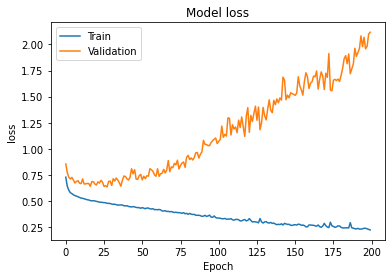

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

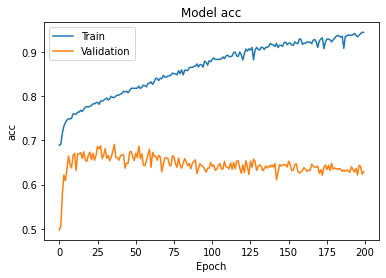

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
pred = lstm.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [17]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred))

정확도 : 0.618986529826812


# LSTM2

In [14]:
lstm2 = Sequential()
lstm2.add(LSTM(units=8, activation='sigmoid', recurrent_activation='hard_sigmoid', input_shape=(arr.shape[1], arr.shape[2])))
# lstm.add(LSTM(units=8, activation='sigmoid', recurrent_activation='hard_sigmoid', input_shape=(8, arr1.shape[2])))
lstm2.add(Dense(units=1, activation='sigmoid'))
print(lstm2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 8)                 22368     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 22,377
Trainable params: 22,377
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
from keras.callbacks import EarlyStopping

lstm2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = lstm2.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=200,  callbacks=[early_stop])

Epoch 1/200
37/37 [==============================] - 4s 17ms/step - loss: 0.6242 - acc: 0.6976 - val_loss: 0.7428 - val_acc: 0.4974
Epoch 2/200
37/37 [==============================] - 0s 7ms/step - loss: 0.5945 - acc: 0.6890 - val_loss: 0.7510 - val_acc: 0.4974
Epoch 3/200
37/37 [==============================] - 0s 7ms/step - loss: 0.5865 - acc: 0.6852 - val_loss: 0.7357 - val_acc: 0.4974
Epoch 4/200
37/37 [==============================] - 0s 7ms/step - loss: 0.5768 - acc: 0.6859 - val_loss: 0.7190 - val_acc: 0.4974
Epoch 5/200
37/37 [==============================] - 0s 8ms/step - loss: 0.5627 - acc: 0.6902 - val_loss: 0.7038 - val_acc: 0.4974
Epoch 6/200
37/37 [==============================] - 0s 7ms/step - loss: 0.5603 - acc: 0.6862 - val_loss: 0.7034 - val_acc: 0.4981
Epoch 7/200
37/37 [==============================] - 0s 7ms/step - loss: 0.5510 - acc: 0.6883 - val_loss: 0.6961 - val_acc: 0.5013
Epoch 8/200
37/37 [==============================] - 0s 7ms/step - loss: 0.5439 - 

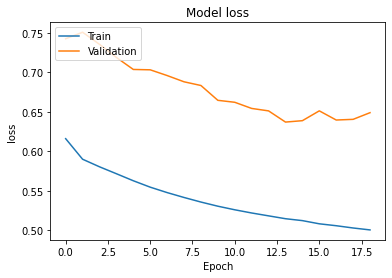

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

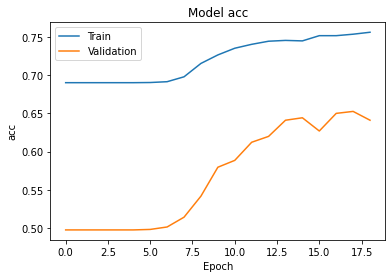

In [17]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [18]:
pred = lstm2.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [19]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred))

정확도 : 0.6337395766516998


# LSTM3

In [20]:
from keras.regularizers import l2
lstm = Sequential()
lstm.add(LSTM(units=50, activation='tanh', input_shape=(arr.shape[1], arr.shape[2]),return_sequences=True))
lstm.add(LSTM(units=50, activation='tanh', input_shape=(12, arr.shape[2])))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10, 50)            148200    
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 168,451
Trainable params: 168,451
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=200, callbacks=[early_stop])

Epoch 1/200
37/37 [==============================] - 3s 29ms/step - loss: 0.6350 - acc: 0.6274 - val_loss: 0.7517 - val_acc: 0.4987
Epoch 2/200
37/37 [==============================] - 1s 17ms/step - loss: 0.5468 - acc: 0.7100 - val_loss: 0.6778 - val_acc: 0.5936
Epoch 3/200
37/37 [==============================] - 1s 16ms/step - loss: 0.5213 - acc: 0.7306 - val_loss: 0.6637 - val_acc: 0.6250
Epoch 4/200
37/37 [==============================] - 1s 17ms/step - loss: 0.5052 - acc: 0.7428 - val_loss: 0.6173 - val_acc: 0.6513
Epoch 5/200
37/37 [==============================] - 1s 17ms/step - loss: 0.4947 - acc: 0.7492 - val_loss: 0.6293 - val_acc: 0.6635
Epoch 6/200
37/37 [==============================] - 1s 16ms/step - loss: 0.4732 - acc: 0.7597 - val_loss: 0.6152 - val_acc: 0.6731
Epoch 7/200
37/37 [==============================] - 1s 17ms/step - loss: 0.4669 - acc: 0.7688 - val_loss: 0.6864 - val_acc: 0.6397
Epoch 8/200
37/37 [==============================] - 1s 16ms/step - loss: 0.

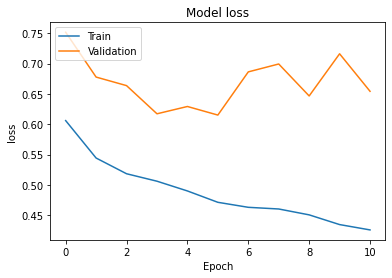

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

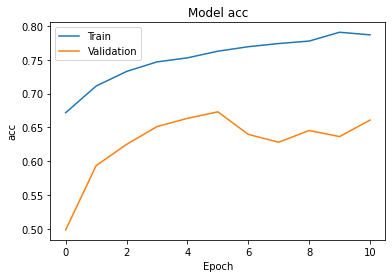

In [23]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [24]:
pred = lstm.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [25]:
pred.shape

(1559, 1)

In [26]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred)) #unit=50

정확도 : 0.6446440025657473


In [358]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred)) #unit=20

정확도 : 0.6805644644002565


In [332]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred))

정확도 : 0.6715843489416292


# LSTM4

In [27]:
from keras.regularizers import l2
lstm = Sequential()
lstm.add(LSTM(units=256, activation='relu', recurrent_activation='hard_sigmoid', input_shape=(arr.shape[1], arr.shape[2]),return_sequences=True))
# lstm.add(Dropout(0.2))
lstm.add(LSTM(units=128, activation='relu', input_shape=(12, arr.shape[2])))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 10, 256)           969728    
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 1,166,977
Trainable params: 1,166,977
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.2, batch_size=512, epochs=200, callbacks=[early_stop])

Epoch 1/200
10/10 [==============================] - 4s 176ms/step - loss: 0.6484 - acc: 0.6305 - val_loss: 0.7536 - val_acc: 0.4696
Epoch 2/200
10/10 [==============================] - 1s 121ms/step - loss: 0.5868 - acc: 0.6945 - val_loss: 0.7805 - val_acc: 0.4696
Epoch 3/200
10/10 [==============================] - 1s 120ms/step - loss: 0.5746 - acc: 0.6815 - val_loss: 0.7640 - val_acc: 0.4768
Epoch 4/200
10/10 [==============================] - 1s 120ms/step - loss: 0.5466 - acc: 0.6983 - val_loss: 0.6697 - val_acc: 0.5633
Epoch 5/200
10/10 [==============================] - 1s 121ms/step - loss: 0.5277 - acc: 0.7167 - val_loss: 0.6833 - val_acc: 0.5497
Epoch 6/200
10/10 [==============================] - 1s 118ms/step - loss: 0.5152 - acc: 0.7209 - val_loss: 0.6792 - val_acc: 0.6066
Epoch 7/200
10/10 [==============================] - 1s 119ms/step - loss: 0.4915 - acc: 0.7516 - val_loss: 0.7433 - val_acc: 0.5769
Epoch 8/200
10/10 [==============================] - 1s 120ms/step - 

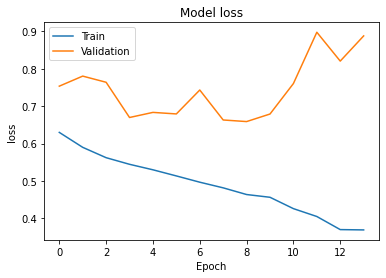

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

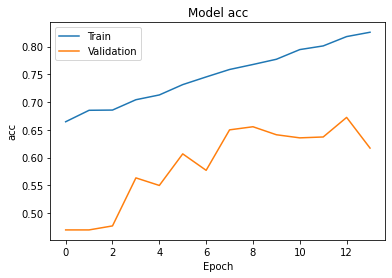

In [30]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [31]:
pred = lstm.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [32]:
pred.shape

(1559, 1)

In [33]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred)) #unit=50

정확도 : 0.6401539448364336
